# Import neccessary library

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from math import pi
import re
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
import plotly.express as px 
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore") 
#pd.set_option('display.max_rows', None) 

# Load Dataset

In [2]:
df1 = pd.read_csv(r"C:\Users\Dell\Downloads\Processed_Flipdata - Processed_Flipdata.csv")

In [3]:
df1

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


# Data Exploration:

In [4]:
df1.shape

(541, 12)

In [5]:
df1.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [7]:
#finding the missing value in percentage of each column
total = df1.isnull().sum().sort_values(ascending = False)
percent = (df1.isnull().sum()/df1.shape[0]*100).round(2).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total null value ', 'Percentage of null value'])

,Total null value,Percentage of null value
Unnamed: 0,0,0.0
Model,0,0.0
Colour,0,0.0
Memory,0,0.0
RAM,0,0.0
Battery_,0,0.0
Rear Camera,0,0.0
Front Camera,0,0.0
AI Lens,0,0.0
Mobile Height,0,0.0


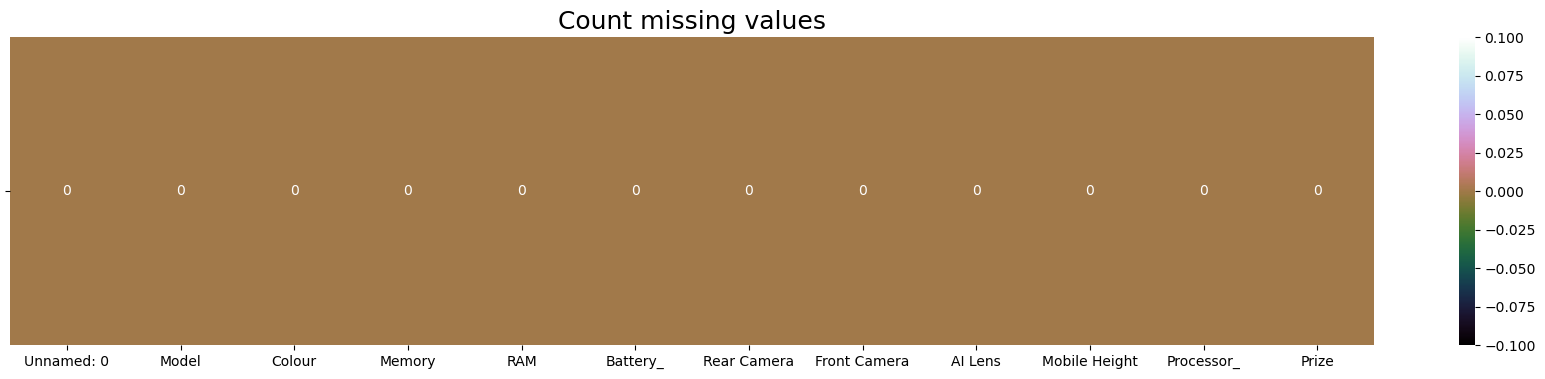

In [8]:
plt.figure(figsize=(22,4))
sns.heatmap((df1.isna().sum()).to_frame(name='').T,cmap='cubehelix', annot=True,
             fmt='0.0f').set_title('Count missing values', fontsize=18)
plt.show()

#### There is no null value in dataset

In [9]:
#finding duplicate value of entire data
df1.duplicated().sum()

0

In [10]:
#identify garbage value
for i in df1.select_dtypes(include='object').columns:
    print(df1[i].value_counts())
    print("***"*5)

Model
vivo Y16                 9
realme C55               9
SAMSUNG Galaxy A14 5G    9
REDMI Note 12 Pro 5G     9
vivo T1 44W              8
                        ..
vivo Y1s                 1
OnePlus Nord             1
Micromax 3               1
vivo Y33s                1
OPPO A77                 1
Name: count, Length: 187, dtype: int64
***************
Colour
Yellow            12
Royal Blue         8
Power Black        8
Black              8
Midnight Black     7
                  ..
Polar Blue         1
Cosmic grey        1
Sea                1
Infinity Black     1
Sky Blue           1
Name: count, Length: 275, dtype: int64
***************
Rear Camera
50MP     260
13MP      63
64MP      62
8MP       52
48MP      31
108MP     31
0MP       10
12MP      10
200MP      8
2MP        6
5MP        3
40MP       2
32MP       2
16MP       1
Name: count, dtype: int64
***************
Front Camera
16MP    164
5MP     135
8MP     129
13MP     49
32MP     22
0MP      16
50MP      7
12MP      6
60MP

# Data Preprocessing: 

### Treatments with columns

In [11]:
# here i am remove the Unnamed: 0 column
df0 = df1.drop(columns=['Unnamed: 0'], axis=1)

In [12]:
# Remove commas from the "Prize" column
df0['Prize'] = df0['Prize'].str.replace(',', '')

# Convert the "Prize" column to float dtype
df0['Prize'] = df0['Prize'].astype(float)

In [13]:
duplicate_rows = df0[df0.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])


Number of duplicate rows: 10


In [14]:
df = df0.drop_duplicates()

In [15]:
print("Number of rows after removing duplicates:", df.shape[0])


Number of rows after removing duplicates: 531


In [16]:
#Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Memory,531.0,110.915254,60.872883,16.0,64.00,128.00,128.00,256.00
RAM,531.0,5.401130,1.991283,2.0,4.00,6.00,8.00,8.00
Battery_,531.0,4873.877589,765.883129,800.0,5000.00,5000.00,5000.00,7000.00
AI Lens,531.0,0.064030,0.245037,0.0,0.00,0.00,0.00,1.00
Mobile Height,531.0,16.450019,2.494246,4.5,16.51,16.71,16.94,41.94
Prize,531.0,16305.775895,10847.038354,920.0,9368.00,13999.00,19338.50,80999.00


In [17]:
df.describe(include="object").T

,count,unique,top,freq
Model,531,187,REDMI Note 12 Pro 5G,9
Colour,531,275,Yellow,12
Rear Camera,531,14,50MP,255
Front Camera,531,13,16MP,162
Processor_,531,123,Qualcomm Snapdragon 680,33


# outliers Detection

In [18]:
num_cols = df.select_dtypes(include='number')

Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = ((num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR)))

num_outliers = outliers.sum()

outliers_df = num_outliers.to_frame().T

print(outliers_df)

   Memory  RAM  Battery_  AI Lens  Mobile Height  Prize
0      55    0       148       34             32     25


In [19]:
#As we identified we have outliers in Memory Battery_  AI Lens  Mobile Height  Prize columns, we will treat them.

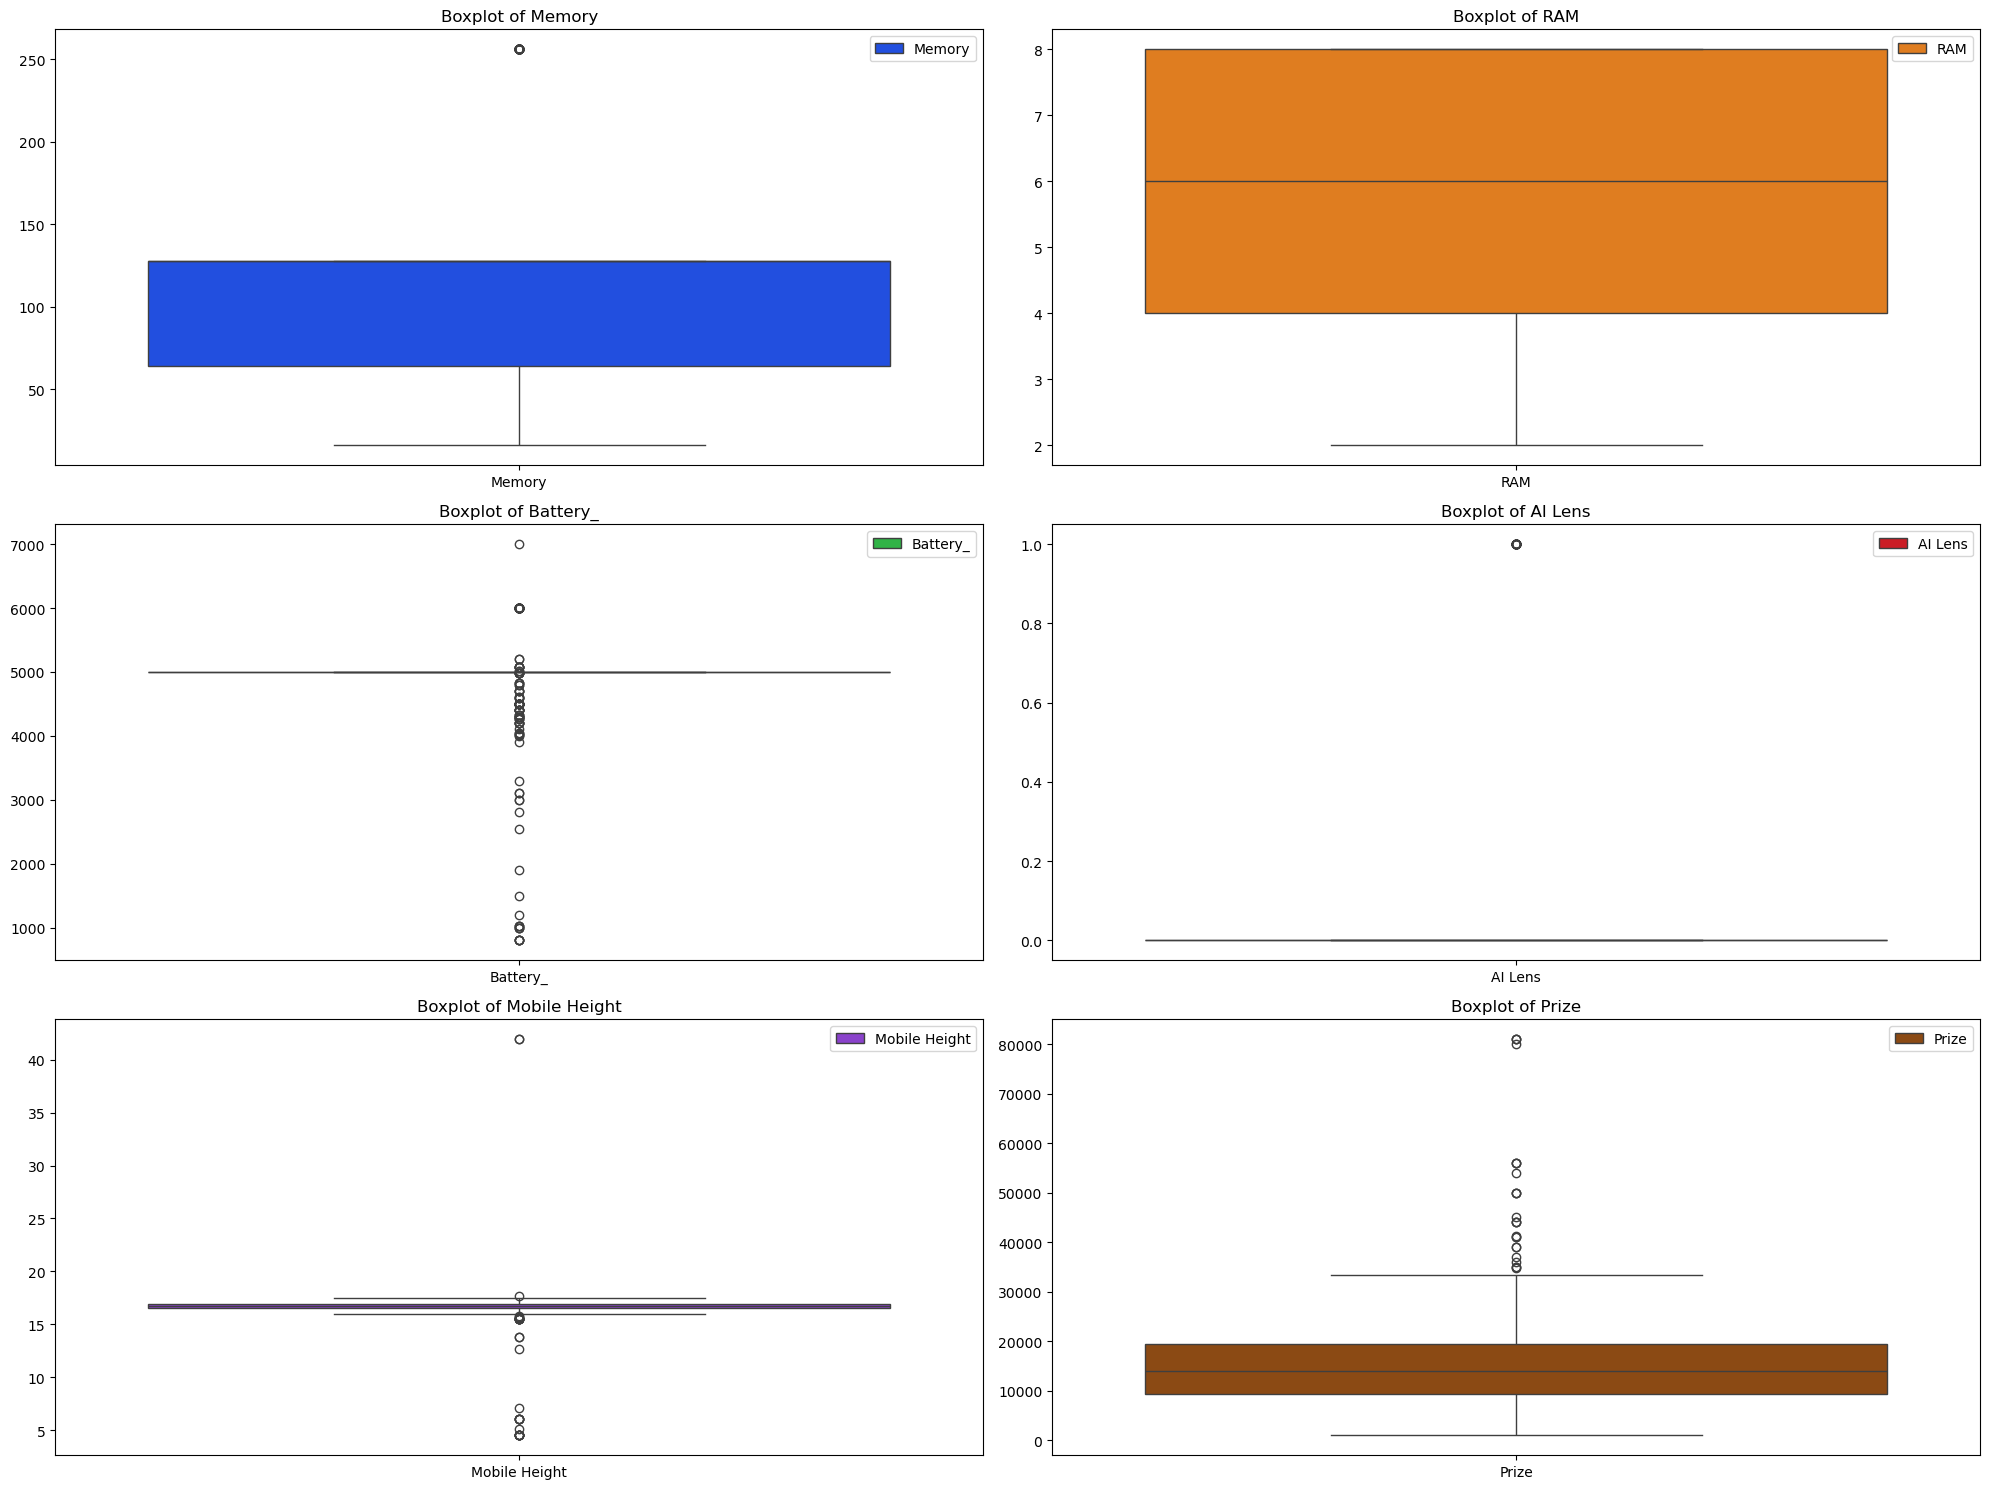

In [20]:
#As we identified outliers throungh Boxplot
numeric_cols = df.select_dtypes(include=['number']).columns

num_rows = (len(numeric_cols) + 1) // 2

fig, axes = plt.subplots(ncols=2, nrows=num_rows, figsize=(20, num_rows * 5))

#Plot the boxplots for each numeric column in the dataset
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df[[col]], ax=axes[i//2][i%2], color=sns.color_palette("bright", len(numeric_cols))[i])
    axes[i//2][i%2].set_title(f'Boxplot of {col}')
    axes[i//2][i%2].legend([col], loc='upper right')

for j in range(len(numeric_cols), num_rows * 2):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

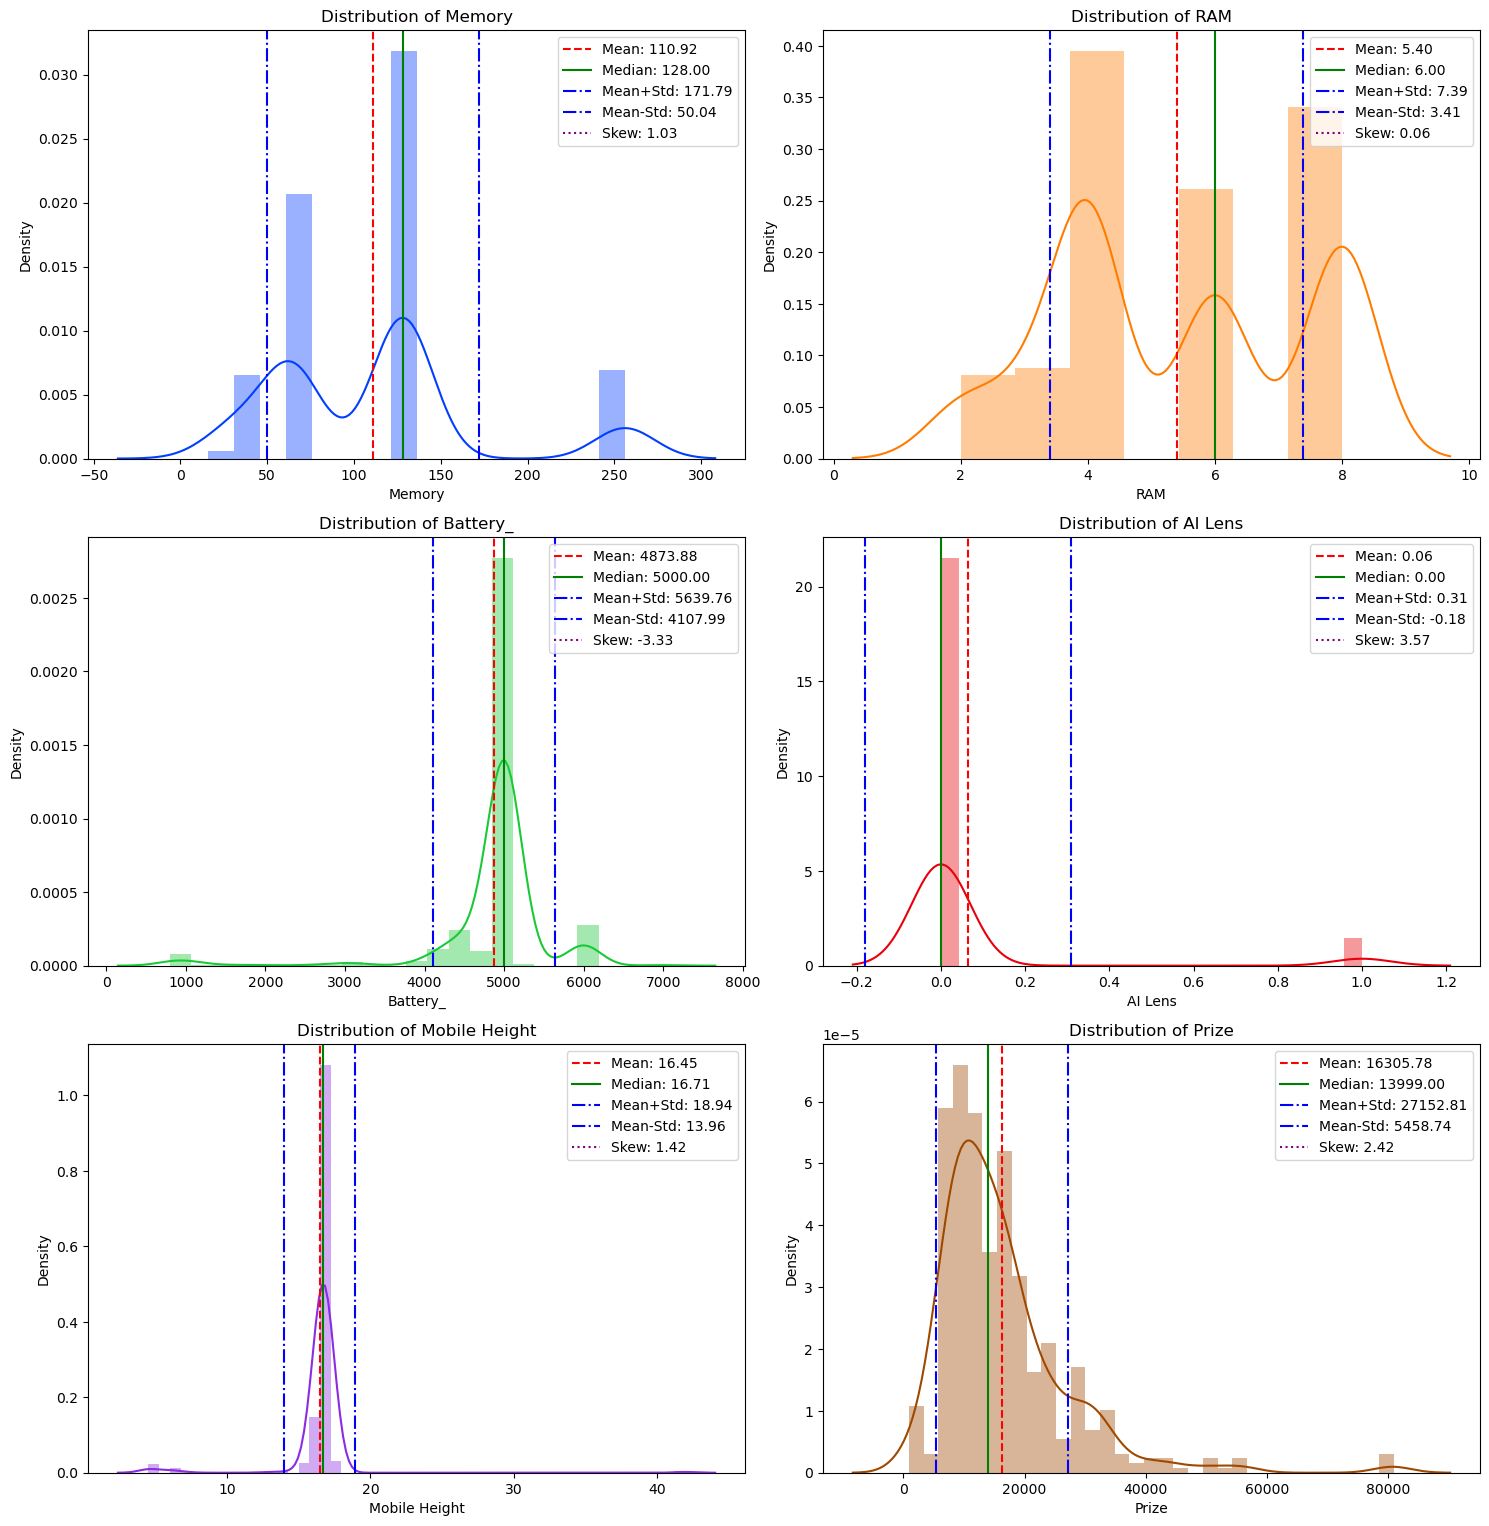

In [21]:
#Here we are checking the data through distplot to see how much each column is skewed
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_cols):
    ax = plt.subplot(len(numeric_cols) // 2 + 1, 2, i + 1)
    
    sns.distplot(df[col], 
                 color=sns.color_palette("bright", len(numeric_cols))[i], 
                 kde=True,
                 ax=ax)
    ax.set_title(f'Distribution of {col}')
    
    mean = df[col].mean()
    std_dev = df[col].std()
    median = df[col].median()
    skewness = df[col].skew()
    
    ax.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
    ax.axvline(mean + std_dev, color='blue', linestyle='-.', label=f'Mean+Std: {mean + std_dev:.2f}')
    ax.axvline(mean - std_dev, color='blue', linestyle='-.', label=f'Mean-Std: {mean - std_dev:.2f}')
    skew_line = Line2D([], [], color='purple', linestyle=':', label=f'Skew: {skewness:.2f}')
    handles, labels = ax.get_legend_handles_labels()
    handles.append(skew_line)
    labels.append(f'Skew: {skewness:.2f}')
    
    ax.legend(handles=handles, loc='upper right')

plt.tight_layout()
plt.show()

# Capping outliers

Here we will not do the treatments of outliers because the price of some mobile model can be high, so we cannot consider it as outliers, so this reason we will not do the treatments of outliers.

No outlier treatment will be done because
Mobile prices can be very high.
Such high prices are considered normal and not true outliers.

# Data Analysis by Plots

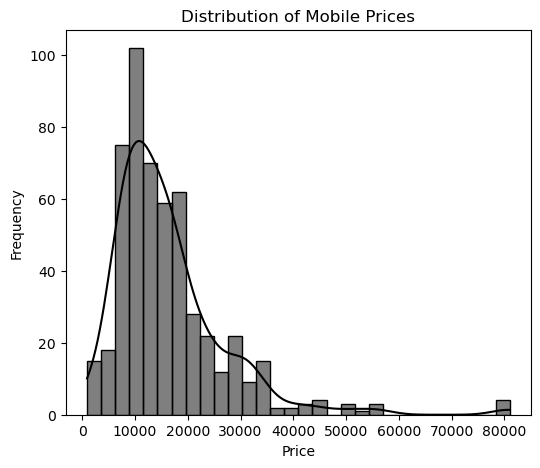

In [22]:
plt.figure(figsize=(6, 5))
sns.histplot(df["Prize"], kde=True, bins=30, color="black")
plt.title("Distribution of Mobile Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

### Insights for Mobile Prize
Dominant Mid-Range Pricing:

Most mobiles are priced between 10,000 and 15,000 units. This range has the highest frequency, indicating a market preference for mid-range devices.

Right-Skewed Distribution:

The distribution is skewed to the right, meaning that while the bulk of the devices are in the lower to mid-price range, there exists a tail with higher-priced models. These expensive models are considerably fewer, hinting at limited high-end options.

Secondary Peak at Premium Levels:

There is a smaller, secondary peak around the 35,000 price range. This suggests a segment of premium devices, even though the overall market is dominated by mid-range pricing.

Market Emphasis on Affordable Options:

The rapid drop in frequency beyond 15,000 indicates that budget and mid-range devices are far more common than high-end models, potentially reflecting consumer demand for affordability and balanced features.

###  Price vs Memory 

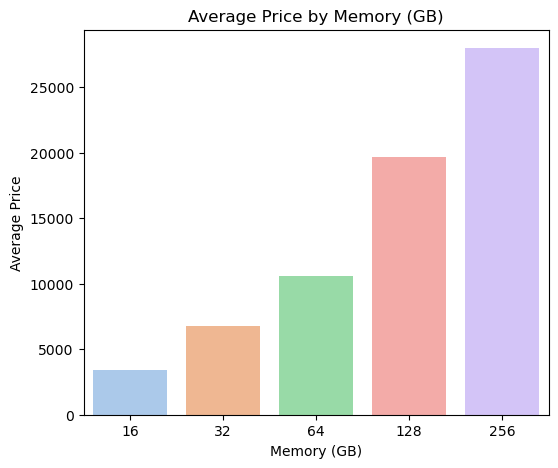

In [23]:
memory_avg = df.groupby("Memory")["Prize"].mean().reset_index()
plt.figure(figsize=(6, 5))
sns.barplot(x="Memory", y="Prize", data=memory_avg, palette="pastel")
plt.title("Average Price by Memory (GB)")
plt.xlabel("Memory (GB)")
plt.ylabel("Average Price")
plt.show()

## Insights

Strong Upward Trend: There’s a clear rise in average price with increasing memory capacity—from around 2,500 for 16 GB devices to about 25,000 for 224 GB devices. This suggests that manufacturers consistently position higher-memory models at a premium.

Market Segmentation by Memory: The data indicates distinct market segments. Devices with lower memory (16 GB) are likely targeting the entry-level, budget-conscious consumers, while higher memory models (128 GB, 224 GB) cater to consumers seeking high-performance or premium features.

Consistent Price Increments: Each step up in memory appears to be associated with a substantial price increase. This implies that added memory is considered a significant upgrade and is likely bundled with other enhanced specifications or features.

Value Perception and Consumer Willingness: The trend reflects a consumer willingness to pay more for higher memory—interpreting the extra cost as a proxy for better performance, longer device longevity, and perhaps additional functionalities.

Devices with prices significantly higher than the general range in their memory category, particularly for models with 32 GB or 64 GB memory, could indicate premium branding, advanced features (like high-resolution cameras or processors), or limited-edition products.

If there are devices with unusually low prices in higher memory categories (like 128 GB or 224 GB), they might be budget models or from lesser-known brands offering aggressive pricing to capture the market.

## Price vs Battery Capacity and RAM

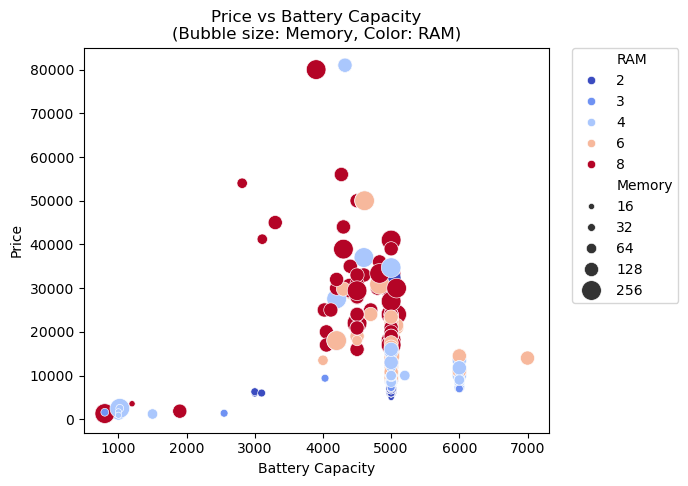

In [24]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x="Battery_", y="Prize", 
                size="Memory", hue="RAM", 
                data=df, sizes=(20, 200), palette="coolwarm", legend="full")
plt.title("Price vs Battery Capacity\n(Bubble size: Memory, Color: RAM)")
plt.xlabel("Battery Capacity")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Insights

Battery Capacity and Price:

Higher battery capacities (e.g., around 5000 mAh) are found across a wide price range, showing that battery capacity alone does not drive price.

Lower battery capacities (below 2000 mAh) are predominantly seen in lower-priced devices, indicating that high battery capacity might be a feature of mid-range or premium models.

RAM Size Influence:

Devices with higher RAM (6 GB and 8 GB, represented by red and dark red bubbles) tend to cluster in the higher price range. This shows a strong relationship between RAM size and price, as higher RAM often correlates with better performance.

Memory and Pricing:

Larger memory sizes (e.g., 128 GB or 224 GB, represented by larger bubbles) are generally associated with higher prices. This suggests that memory size is a key differentiator in pricing strategies.

Mid-Range Devices Dominate:

The majority of devices are clustered in the mid-price range (10,000–20,000), reflecting strong consumer demand for affordable yet feature-rich smartphones.

Premium Segment Presence:

High-end devices with superior RAM and memory specifications occupy the upper price range (above 25,000). These cater to niche markets focused on performance and advanced features.

Battery-Centric Prioritization:

Manufacturers consistently offer 5000 mAh batteries across multiple price points, signaling that battery longevity is a universal consumer demand across all segments.

RAM as a Price Driver:

Increased RAM sizes, particularly 6 GB and 8 GB, appear to significantly drive up prices, reflecting consumer expectations for better multitasking capabilities and speed.

## Prize vs RAM

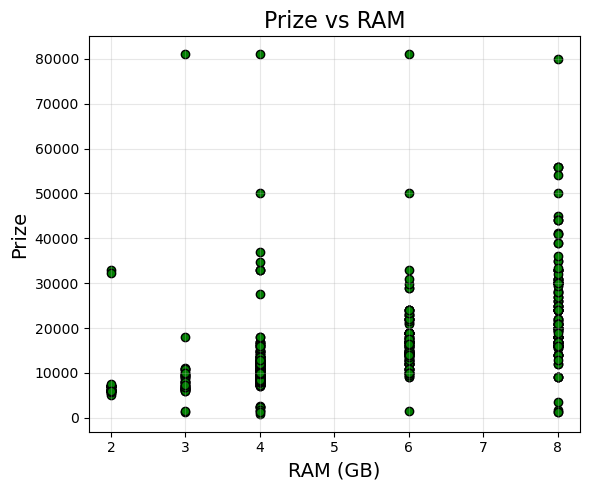

In [25]:
# Plotting the scatter plot
plt.figure(figsize=(6, 5))
plt.scatter(df['RAM'], df['Prize'], color='green', edgecolor='black')
plt.title('Prize vs RAM', fontsize=16)
plt.xlabel('RAM (GB)', fontsize=14)
plt.ylabel('Prize', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Insights

Wide Price Range: For each RAM category, there is a significant variation in prices, indicating that factors beyond RAM (like brand, camera quality, or processor) influence the price.

Popular Configurations: The highest concentration of data points is for 4 GB and 6 GB RAM, suggesting these are the most common configurations in the market.

Segments: Higher RAM configurations (7 GB and 8 GB) have fewer data points, indicating they cater to a niche market or are less frequently available.

Non-linear Relationship: There isn't a clear linear relationship between RAM and price, as devices with the same RAM can have vastly different prices.

Demand for Mid-range Devices: The popularity of 4 GB and 6 GB RAM devices suggests a strong demand for mid-range smartphones.

Premium Segment Growth: Devices with higher RAM (7 GB and 8 GB) are less common, but they likely target premium users who prioritize performance.

Diverse Pricing: The wide price range within each RAM category highlights the importance of other features (like camera quality, battery life, or brand reputation) in determining the price.

## Sale Price by Rear Camera

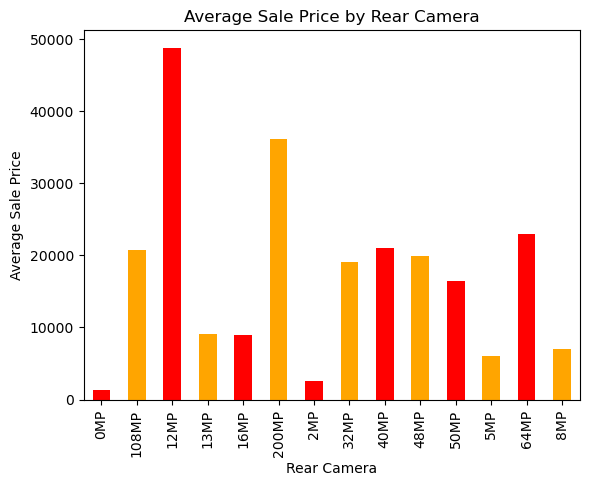

In [26]:
average_prices = df.groupby('Rear Camera')['Prize'].mean()
average_prices.plot(kind='bar', color=['red', 'orange'])
plt.xlabel('Rear Camera')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Rear Camera')
plt.show()

## Insights

Higher Megapixels = Higher Price (Generally): Smartphones with higher-resolution cameras (e.g., 108MP, 200MP) are associated with higher average prices. This reflects a general trend that users value powerful cameras for photography and are willing to pay more for them.

Price Peaks at Specific Resolutions:

Phones with 12MP and 200MP cameras have significantly higher prices compared to most others, indicating that specific resolutions might be associated with premium devices or flagship models.

Interestingly, 12MP surpasses some higher resolutions (like 50MP), suggesting that additional factors like camera quality, brand reputation, or added software features also play a role.

Low-Resolution Cameras = Budget Segment:

Cameras with 0MP, 2MP, 5MP, and 8MP dominate the lower price range, serving customers looking for affordable options without prioritizing high camera quality.

Mid-Range Dominance:

Cameras like 32MP, 40MP, and 48MP are associated with mid-range prices, likely targeting a balance between affordability and decent camera performance.

Growing Demand for Photography-Centric Phones:

The strong association between high megapixels and higher prices reflects the ongoing consumer interest in photography as a key smartphone feature.

Premium Devices Leverage Camera Technology:

Flagship models (with 108MP or 200MP cameras) often showcase cutting-edge camera capabilities to appeal to premium buyers, justifying their higher prices.

Varied Consumer Preferences:

The presence of both high-end and budget-friendly options with different camera resolutions suggests a segmented market catering to diverse consumer needs—budget, mid-range, and premium segments.

## Sale Price by Front Camera

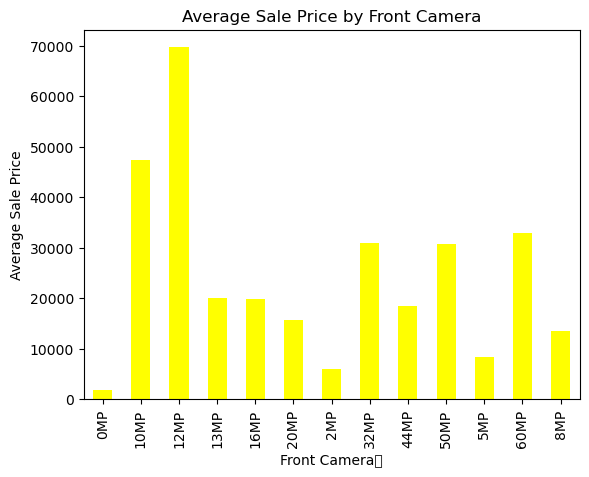

In [27]:
average_condition_prices = df.groupby('Front Camera')['Prize'].mean()
average_condition_prices.plot(kind='bar', color='yellow')
plt.xlabel('Front Camera	')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Front Camera')
plt.show()

## Insights

Higher Front Camera Resolutions = Higher Prices: Devices with higher front camera resolutions, such as 10MP, 12MP, and 32MP, have the highest average prices, indicating that consumers value better front cameras, likely for selfies or video calls.

Middle Range Pricing: Cameras like 16MP and 44MP have moderate prices, suggesting they cater to mid-range buyers who want good-quality cameras without entering the premium segment.

Low-Resolution Cameras = Budget Devices: Front cameras with 2MP, 5MP, and 8MP have lower prices, showing that they are most common in budget-friendly smartphones.

Anomalies:

Devices with 12MP front cameras stand out with prices similar to higher-resolution cameras, indicating that other factors like software optimization, brand, or overall performance are contributing to higher pricing.

Selfie-Centric Demand: The rising prices of smartphones with higher front camera resolutions show a clear demand for selfie-centric phones, especially in the premium and mid-range markets.

Affordable Options for Budget Buyers: The availability of 2MP and 5MP cameras in lower-priced devices highlights the continued focus on budget-conscious consumers.

Brand Differentiation Through Software: The high prices for some mid-resolution front cameras (like 12MP) suggest that brands differentiate themselves by optimizing camera software and features.

Mid-Range Focus: A significant segment of the market targets mid-range buyers, with balanced features like 16MP or 44MP cameras and competitive prices.

## Correlation Heatmap for Numeric Features

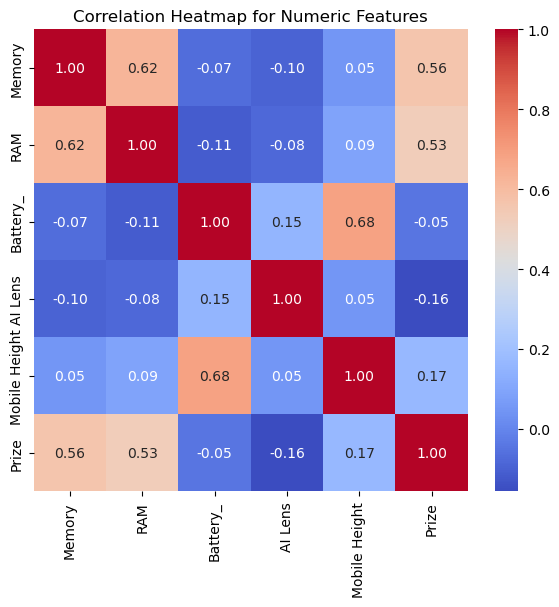

In [28]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
plt.figure(figsize=(7, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Numeric Features")
plt.show()

## Insights

Memory and RAM: A strong positive correlation (0.62) suggests that devices with higher memory often come with higher RAM, indicating a trend toward more powerful multitasking capabilities in premium devices.

Battery and Mobile Height: A moderate positive correlation (0.68) implies that larger devices tend to have better battery capacity, aligning with the market trend of larger smartphones catering to users who prioritize battery life.

Price and Features: Price shows a moderate positive correlation with Memory (0.56) and RAM (0.53), suggesting that higher-end devices with better specifications are priced accordingly. However, the weak negative correlation between AI Lens and Price (-0.16) indicates that the presence of AI features doesn't significantly drive up costs, reflecting a trend of making AI more accessible.

Negligible Correlations: Most other features show weak or negligible correlations, suggesting that they don't strongly influence one another, which could indicate diverse consumer preferences.

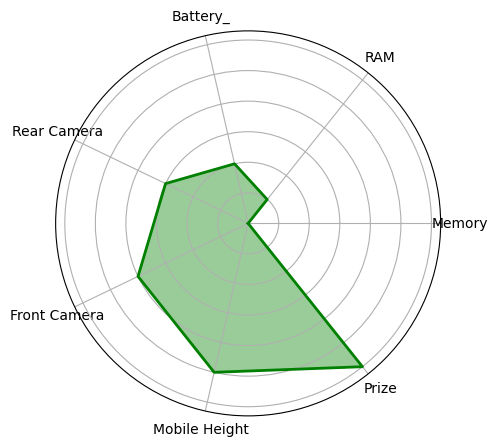

In [29]:
categories = ['Memory', 'RAM', 'Battery_', 'Rear Camera', 'Front Camera', 'Mobile Height', 'Prize']
values = df1.iloc[0][categories].values.flatten().tolist()
values += values[:1]

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]
custom_color = 'green'
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(polar=True))
ax.plot(angles, values, linewidth=2, linestyle='solid', color=custom_color)  # Line color
ax.fill(angles, values, color=custom_color, alpha=0.4)  # Fill color
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.show()

## Insights

Balanced Attributes:
The chart demonstrates a relatively even distribution across categories like Memory, Battery, and Mobile Height. This indicates the device is well-rounded in these aspects.

Strengths:
Battery Capacity is a standout feature, suggesting the mobile offers long-lasting performance—appealing to users who prioritize battery life.

Memory (Storage) is also strong, making it suitable for users who store significant amounts of data, such as photos, videos, or apps.

Weaknesses:
Front Camera is relatively weaker compared to other attributes, which may limit its appeal for selfie-focused buyers or users who prioritize front-facing camera quality.

Pricing Alignment:
Based on the shape of the chart, the Prize appears proportional to the overall specifications. This suggests that the device's price is justified by its features.

Mobile Height:
The Mobile Height aligns with current trends for standard-sized smartphones, neither bulky nor ultra-compact. This fits well into the mainstream market.

# Model Building

In [30]:
#here i am using regex Function removing MP from camera Columns
def remove_mp(camera):
    return re.sub(r'MP', '', camera)

df["Rear Camera"] = df["Rear Camera"].apply(remove_mp).astype(int)
df["Front Camera"] = df["Front Camera"].apply(remove_mp).astype(int)

df.rename(columns={"Rear Camera": "Rear Camera MP", "Front Camera": "Front Camera MP"}, inplace=True)
print(df.dtypes) 

Model               object
Colour              object
Memory               int64
RAM                  int64
Battery_             int64
Rear Camera MP       int32
Front Camera MP      int32
AI Lens              int64
Mobile Height      float64
Processor_          object
Prize              float64
dtype: object


In [31]:
# here i am using LabelEncoder for ccategorical column covert to number form

In [32]:
categorical_columns = ["Model","Processor_","Colour",]
encoder = LabelEncoder()
for categorical_col in categorical_columns:
    df[categorical_col] = encoder.fit_transform(df[categorical_col])

In [33]:
df

,Model,Colour,Memory,RAM,Battery_,Rear Camera MP,Front Camera MP,AI Lens,Mobile Height,Processor_,Prize
0,23,159,64,4,6000,13,5,1,16.76,113,7299.0
1,23,20,64,4,6000,13,5,1,16.76,113,7299.0
2,37,149,128,8,5000,50,16,0,16.64,75,11999.0
3,69,201,32,2,5000,8,5,0,16.56,56,5649.0
4,12,130,128,8,5000,50,5,1,16.76,14,8999.0
...,...,...,...,...,...,...,...,...,...,...,...
536,118,49,256,8,3900,50,12,0,15.49,89,79999.0
537,32,52,32,2,3100,5,2,0,12.70,68,5998.0
538,123,259,64,4,5000,50,8,0,16.76,35,9990.0
539,110,17,128,8,5000,50,32,0,16.26,11,38999.0


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Model,531.0,96.329567,52.660309,0.0,53.00,98.00,142.50,186.00
Colour,531.0,134.009416,78.913554,0.0,66.00,132.00,199.00,274.00
Memory,531.0,110.915254,60.872883,16.0,64.00,128.00,128.00,256.00
RAM,531.0,5.401130,1.991283,2.0,4.00,6.00,8.00,8.00
Battery_,531.0,4873.877589,765.883129,800.0,5000.00,5000.00,5000.00,7000.00
Rear Camera MP,531.0,46.227872,31.392146,0.0,13.00,50.00,50.00,200.00
Front Camera MP,531.0,12.045198,9.105142,0.0,5.00,8.00,16.00,60.00
AI Lens,531.0,0.064030,0.245037,0.0,0.00,0.00,0.00,1.00
Mobile Height,531.0,16.450019,2.494246,4.5,16.51,16.71,16.94,41.94
Processor_,531.0,61.753296,32.320876,0.0,41.00,61.00,83.00,122.00


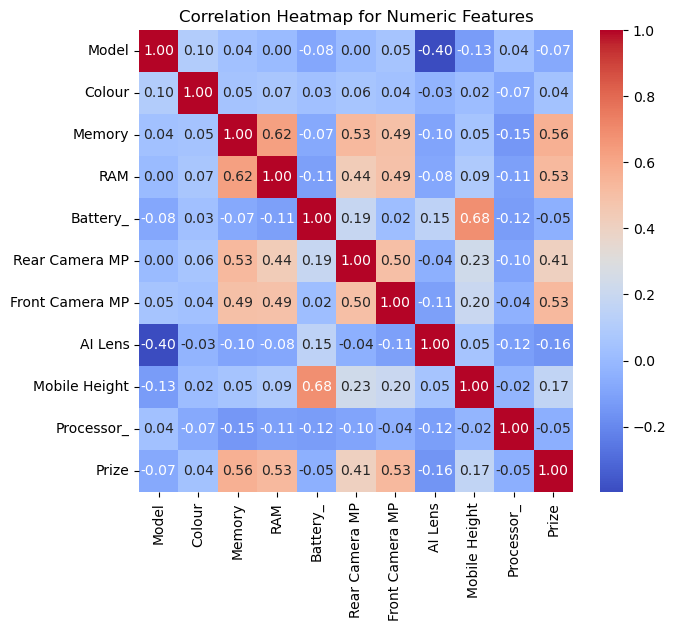

In [35]:
numeric_cols = df.select_dtypes(include=["number"]).columns
plt.figure(figsize=(7, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Numeric Features")
plt.show()

In [36]:
df.corr().T

,Model,Colour,Memory,RAM,Battery_,Rear Camera MP,Front Camera MP,AI Lens,Mobile Height,Processor_,Prize
Model,1.000000,0.101375,0.038629,0.004135,-0.082135,0.003558,0.052644,-0.397750,-0.127906,0.038342,-0.073833
Colour,0.101375,1.000000,0.046086,0.065547,0.030428,0.059342,0.038582,-0.029987,0.015793,-0.073121,0.040595
Memory,0.038629,0.046086,1.000000,0.624728,-0.070355,0.527890,0.493396,-0.096529,0.050946,-0.146395,0.563535
RAM,0.004135,0.065547,0.624728,1.000000,-0.112560,0.437132,0.491954,-0.083673,0.089294,-0.110272,0.529474
Battery_,-0.082135,0.030428,-0.070355,-0.112560,1.000000,0.191132,0.021995,0.153704,0.684077,-0.119897,-0.046250
Rear Camera MP,0.003558,0.059342,0.527890,0.437132,0.191132,1.000000,0.502209,-0.044825,0.232984,-0.095214,0.406784
Front Camera MP,0.052644,0.038582,0.493396,0.491954,0.021995,0.502209,1.000000,-0.113775,0.201570,-0.038847,0.529013
AI Lens,-0.397750,-0.029987,-0.096529,-0.083673,0.153704,-0.044825,-0.113775,1.000000,0.051182,-0.116167,-0.156336
Mobile Height,-0.127906,0.015793,0.050946,0.089294,0.684077,0.232984,0.201570,0.051182,1.000000,-0.024685,0.168303
Processor_,0.038342,-0.073121,-0.146395,-0.110272,-0.119897,-0.095214,-0.038847,-0.116167,-0.024685,1.000000,-0.049600


In [37]:
features = df.iloc[:,:-1]
target = df["Prize"]

In [38]:
features

,Model,Colour,Memory,RAM,Battery_,Rear Camera MP,Front Camera MP,AI Lens,Mobile Height,Processor_
0,23,159,64,4,6000,13,5,1,16.76,113
1,23,20,64,4,6000,13,5,1,16.76,113
2,37,149,128,8,5000,50,16,0,16.64,75
3,69,201,32,2,5000,8,5,0,16.56,56
4,12,130,128,8,5000,50,5,1,16.76,14
...,...,...,...,...,...,...,...,...,...,...
536,118,49,256,8,3900,50,12,0,15.49,89
537,32,52,32,2,3100,5,2,0,12.70,68
538,123,259,64,4,5000,50,8,0,16.76,35
539,110,17,128,8,5000,50,32,0,16.26,11


In [39]:
target

0       7299.0
1       7299.0
2      11999.0
3       5649.0
4       8999.0
        ...   
536    79999.0
537     5998.0
538     9990.0
539    38999.0
540    15999.0
Name: Prize, Length: 531, dtype: float64

In [40]:
Scaler = StandardScaler()

In [41]:
features = pd.DataFrame(Scaler.fit_transform(features),columns=features.columns)

In [42]:
features

,Model,Colour,Memory,RAM,Battery_,Rear Camera MP,Front Camera MP,AI Lens,Mobile Height,Processor_
0,-1.393815,0.316982,-0.771435,-0.704295,1.471745,-1.059475,-0.774490,3.823303,0.124396,1.587056
1,-1.393815,-1.446100,-0.771435,-0.704295,1.471745,-1.059475,-0.774490,3.823303,0.124396,1.587056
2,-1.127709,0.190141,0.280927,1.306354,0.164831,0.120275,0.434758,-0.261554,0.076240,0.410236
3,-0.519468,0.849711,-1.297617,-1.709620,0.164831,-1.218901,-0.774490,-0.261554,0.044136,-0.178173
4,-1.602898,-0.050856,0.280927,1.306354,0.164831,0.120275,-0.774490,3.823303,0.124396,-1.478868
...,...,...,...,...,...,...,...,...,...,...
526,0.411902,-1.078263,2.385653,1.306354,-1.272774,0.120275,-0.004969,-0.261554,-0.385256,0.843801
527,-1.222747,-1.040211,-1.297617,-1.709620,-2.318304,-1.314556,-1.104285,-0.261554,-1.504886,0.193454
528,0.506939,1.585386,-0.771435,-0.704295,0.164831,0.120275,-0.444695,-0.261554,0.124396,-0.828521
529,0.259841,-1.484153,0.280927,1.306354,0.164831,0.120275,2.193664,-0.261554,-0.076255,-1.571775


## Data Splitting

In [43]:
X_train , X_test, y_train , y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [44]:
print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)
print("X_test shape :", X_test.shape)
print("y_test shape :", y_test.shape)

X_train shape : (424, 10)
y_train shape : (424,)
X_test shape : (107, 10)
y_test shape : (107,)


## Linear Regression

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train,y_train)

LinearRegression()

In [47]:
model.score(X_train,y_train)*100 , model.score(X_test,y_test)*100

(49.244172625375725, 26.722429206164467)

In [48]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-2117.44558882   301.18591183  3012.24612892  1868.90799056
 -1664.88220827   421.05335773  2906.11336094 -1603.40426323
  2520.16281469  -216.25540367]
Intercept: 16496.972317372798


## DecisionTreeRegressor

In [49]:
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)
DT.score(X_train,y_train)*100 , DT.score(X_test,y_test)*100

(99.98168789664687, 11.831264543412889)

In [50]:
mean_squared_error(y_test,DT.predict(X_test)),mean_absolute_error(y_test,DT.predict(X_test))

(92959396.71261682, 2563.228971962617)

## RandomForestRegressor

In [82]:
print("Feature names shape:", len(X_train.columns))
print("Feature importances shape:", len(RF.feature_importances_))

Feature names shape: 10
Feature importances shape: 10


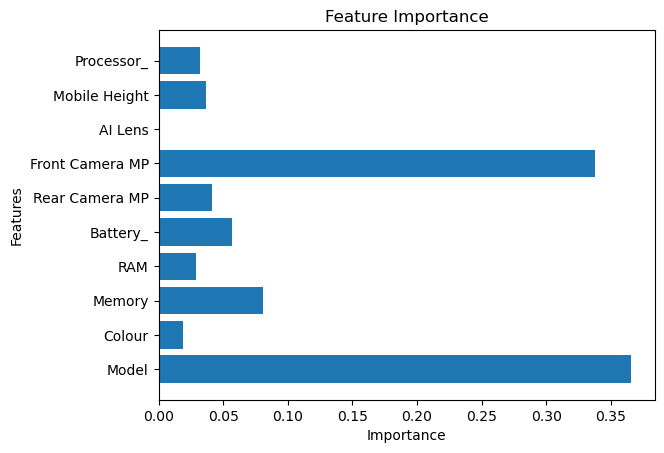

In [83]:
feature_names = X_train.columns  

if len(feature_names) == len(RF.feature_importances_):
    plt.barh(feature_names, RF.feature_importances_)
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance')
    plt.show()
else:
    print("Shape mismatch persists. Please double-check your data preprocessing.")


# Insights
Most Important Features:

Model and Front Camera MP are the most important features based on their high importance scores. This indicates they have the strongest influence on predicting the price.

Moderately Important Features:

Features like Memory and Rear Camera MP show medium importance. While they contribute to price prediction, their impact is not as significant as Model or Front Camera MP.

Least Important Features:

Features like AI Lens, Colour, and RAM have very low importance scores. This suggests they have minimal influence on predicting the price.

Interpretation:

The high importance of Model may signify that the branding or series of the mobile plays a crucial role in its pricing.Similarly, technical specifications like Front Camera MP and Memory are critical factors influencing both customer buying decisions and pricing.

Actionable Insights:

To optimize your model, you can focus on the most important features (Model, Front Camera MP, Memory) for better predictions.

Low-importance features such as AI Lens and Colour could potentially be dropped to reduce computational costs without significantly impacting model accuracy.

In [51]:
RF = RandomForestRegressor(n_estimators=10)
RF.fit(X_train,y_train)
RF.score(X_train,y_train)*100 , RF.score(X_test,y_test)*100

(97.91003329983022, 50.57328368160181)

In [52]:
#The accuracy of RandomForest is better than DecisionTreeRegressor so we will use RandomForest to build the model

In [53]:
mean_squared_error(y_test,RF.predict(X_test)),mean_absolute_error(y_test,RF.predict(X_test))

(52112324.245665245, 2410.5714174454824)

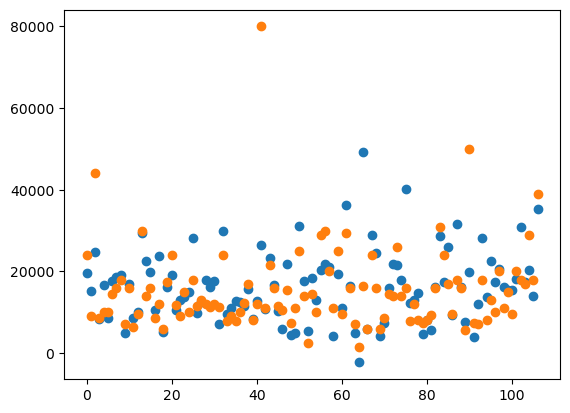

In [54]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(range(len(y_pred)), y_pred)
plt.scatter(range(len(y_pred)),y_test)
plt.show()

In [55]:
RF.predict([[1.533347,1.610754,0.280927,1.306354,-0.488626,0.566667,0.434758,-0.261554,-0.096320,-0.333018]])

array([24698.1])

In [56]:
y_test

527    23999.0
6       8999.0
327    43999.0
423     8499.0
507     9999.0
        ...   
348    17999.0
301    16999.0
136    28999.0
429    17999.0
455    38920.0
Name: Prize, Length: 107, dtype: float64

In [57]:
test_predictions = RF.predict(X_test)

In [58]:
test_predictions

array([24698.1       ,  9949.        , 44999.        ,  7379.        ,
       10072.5       , 10299.        , 14099.        , 15597.2       ,
       20699.        ,  6899.        , 13129.        ,  5143.8       ,
        9549.        , 25249.        , 15098.1       , 16549.        ,
        9284.        , 14449.        ,  6405.1       , 16449.        ,
       23199.        , 11194.        ,  8899.        , 14398.1       ,
        9183.1       , 19353.1       , 11269.        , 12699.        ,
       12899.        , 12942.475     , 12999.        , 11548.1       ,
       24853.1       ,  8018.4       ,  8799.        , 10098.1       ,
       10089.        , 13817.75      , 17349.        ,  9063.1       ,
       11799.        , 31049.        , 11199.        , 18999.        ,
       15498.1       , 11504.        , 11054.        , 15098.        ,
        6953.9       , 11049.        , 25146.9       , 13999.        ,
        2337.9       , 12649.        , 10139.        , 64099.        ,
      

In [59]:
MAE = mean_absolute_error(y_test, test_predictions).round(3)
MSE = mean_squared_error(y_test, test_predictions).round(3)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions)).round(3)
print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

MAE: 2410.571, MSE: 52112324.246, RMSE: 7218.887


In [60]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)  
cv_scores = cross_val_score(RF, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores) 
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean cross-validation RMSE:", cv_rmse_scores.mean())

model.fit(X_train, y_train)
y_pred = RF.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nPredictions:")

predictions_df.to_csv('predictions.csv', index=False)


Cross-validation RMSE scores: [4647.98598937 5275.45498208 3529.5927447  7514.05676492 3400.70523719]
Mean cross-validation RMSE: 4873.559143653291
Mean Squared Error: 52112324.245665245
R-squared: 0.5057328368160181

Predictions:


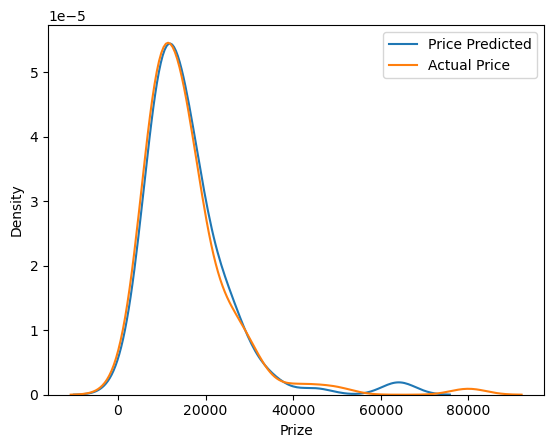

In [61]:
sns.kdeplot(data=test_predictions, label="Price Predicted")
sns.kdeplot(data=y_test, label="Actual Price")
plt.legend()
plt.show()

In [62]:
df.to_csv('final-File.csv', index=False)